In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
# Charger les données CIFAR-10 et les transformer en tenseurs
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='C:/Users/hp/Desktop/Python Projects/cifar-10-batches-py', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)


Files already downloaded and verified


In [3]:
# Convertir une image en graphe
def image_to_graph(image):
    graph = nx.Graph()

    # Ajouter les pixels comme des nœuds
    height, width, _ = image.shape
    for y in range(height):
        for x in range(width):
            pixel_value = tuple(image[y, x].tolist())
            normalized_pixel_value = tuple(value / 255.0 for value in pixel_value)  # Normaliser les valeurs des pixels
            graph.add_node((x, y), pixel_value=normalized_pixel_value)

    # Ajouter des arêtes entre les pixels voisins
    for y in range(height):
        for x in range(width):
            if x < width - 1:
                graph.add_edge((x, y), (x + 1, y))
            if y < height - 1:
                graph.add_edge((x, y), (x, y + 1))

    return graph


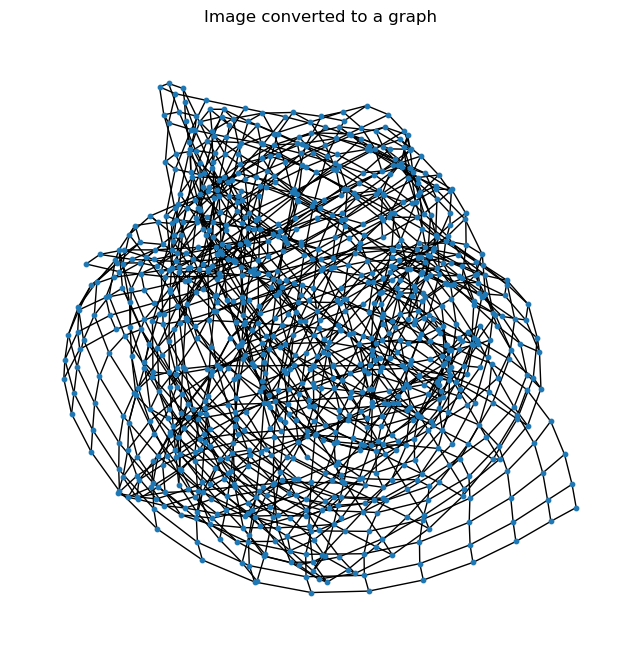

In [4]:
# Select an image to test the function
test_image_index = 5
test_image, _ = trainset[test_image_index]

# Convert the image to a graph
test_graph = image_to_graph(test_image.permute(1, 2, 0).numpy())

# Visualize the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(test_graph)
nx.draw_networkx(test_graph, pos, node_size=10, with_labels=False)
plt.title('Image converted to a graph')
plt.axis('off')
plt.show()

Files already downloaded and verified


In [11]:
from sklearn.model_selection import train_test_split

# Supposons que vous avez une liste de graphes
image_to_graph = [graph1, graph2, graph3, ...]  # Remplacez graph1, graph2, graph3, ... par vos graphes réels

# Supposons également que vous avez une liste d'étiquettes correspondantes
labels = [0, 1, 0, 1, 2, 0, 2, 1, 2, 0]  # Remplacez les étiquettes par vos propres étiquettes

# Diviser les données en ensembles d'entraînement et de validation
graphs_train, graphs_val, labels_train, labels_val = train_test_split(image_to_graph, labels, test_size=0.2, random_state=42)

# Définir le modèle MyGraphModel
class MyGraphModel(nn.Module):
    def __init__(self, num_nodes):
        super(MyGraphModel, self).__init__()
        self.linear = nn.Linear(num_nodes, 3)
        self.conv1 = GCNConv(3, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 3)
        self.fc1 = nn.Linear(3, 10)

    def forward(self, x, edge_index):
        edge_index = to_undirected(edge_index)
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
        x = self.linear(x)
        x = self.conv1(x, edge_index)
        x = nn.functional.relu(x)
        x = self.conv2(x, edge_index)
        x = nn.functional.relu(x)
        x = self.conv3(x, edge_index)
        x = nn.functional.relu(x)
        x = nn.functional.avg_pool2d(x, kernel_size=x.size()[2:])
        x = x.view(x.size(0), -1)
        logits = self.fc1(x)
        out = nn.functional.softmax(logits, dim=1)
        return out


NameError: name 'graph1' is not defined

In [ ]:
from torch_geometric.data import Data

# Créez un graphe vide
graph = nx.Graph()
# Ajoutez des nœuds et des arêtes à votre graphe

# Ajoutez les caractéristiques des nœuds à l'aide d'attributs
for node_id, node_data in graph.nodes(data=True):
    node_data['node_features'] = [0.5, 0.2, 0.7, ...]  # Remplacez les valeurs par vos caractéristiques réelles

# Créez les ensembles de données et les chargeurs de données
train_data = [Data(x=torch.tensor(graph.node[node_id]['node_features']), edge_index=torch.tensor(graph.edges), y=label) for graph, label in zip(graphs_train, labels_train)]
val_data = [Data(x=torch.tensor(graph.node[node_id]['node_features']), edge_index=torch.tensor(graph.edges), y=label) for graph, label in zip(graphs_val, labels_val)]
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1, shuffle=False)

class MyGraphModel(nn.Module):
    def __init__(self, num_nodes):
        super(MyGraphModel, self).__init__()
        self.num_nodes = num_nodes
        # Autres initialisations de votre modèle

    def forward(self, graph, edge_index):
        # Votre logique de propagation avant (forward) ici
        pass

# Utilisation du modèle avec l'argument 'num_nodes'
model = MyGraphModel(num_nodes=32*32)  # Remplacez 32*32 par la taille réelle de vos images

# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()

# Entraînement du modèle
num_epochs = 10
num_nodes = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Ajout de l'optimiseur
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for batch in train_loader:
        graph, label = batch
        graph = graph.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(graph, edge_index=None)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * graph.num_graphs
        _, predicted = output.max(dim=1)
        train_correct += predicted.eq(label).sum().item()
    train_loss /= len(graphs_train)
    train_acc = train_correct / len(graphs_train)


In [ ]:
model.eval()
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for batch in val_loader:
            graph, label = batch
            graph = graph.to(device)
            label = label.to(device)
            output = model(graph, edge_index=None)
            loss = criterion(output, label)
            val_loss += loss.item() * graph.num_graphs
            _, predicted = output.max(dim=1)
            val_correct += predicted.eq(label).sum().item()
    val_loss /= len(graphs_val)
    val_acc = val_correct / len(graphs_val)
     print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")